In [1]:
# YouTube Trending Video Analytics Project

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('USvideos.csv')
df.head()


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [ ]:
# Clean Data

In [4]:
df.drop_duplicates(inplace=True)

In [6]:
df['trending_date'] = pd.to_datetime(df['trending_date'], errors='coerce')
df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')


In [ ]:
# Top Categories

In [7]:
category_counts = df['category_id'].value_counts()

In [8]:
plt.figure(figsize=(10,5))

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Axes: xlabel='category_id'>

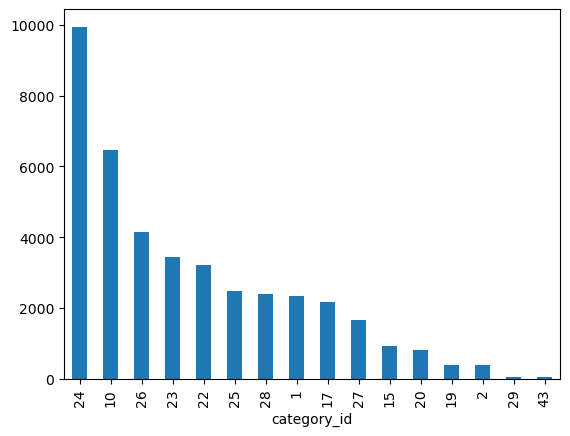

In [9]:
category_counts.plot(kind='bar')

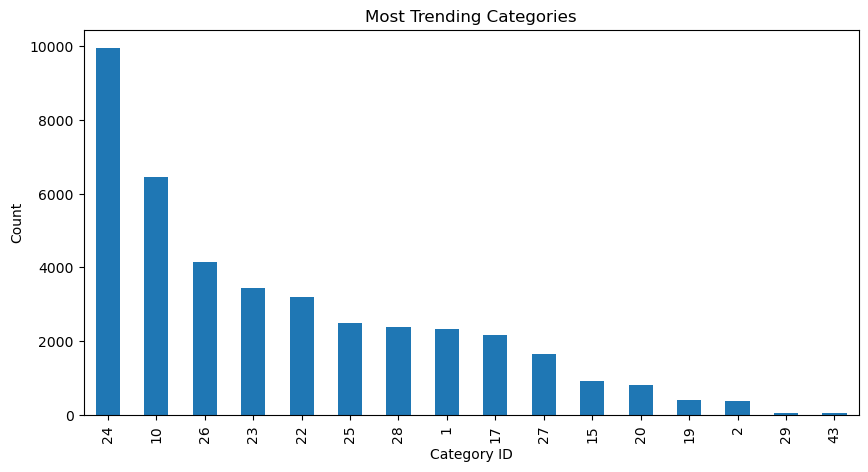

In [11]:
category_counts = df['category_id'].value_counts()
plt.figure(figsize=(10,5))
category_counts.plot(kind='bar')
plt.title("Most Trending Categories")
plt.xlabel("Category ID")
plt.ylabel("Count")
plt.show()

In [ ]:
# Trending Duration Analysis

In [12]:
duration_df = df.groupby('video_id').agg({'trending_date': ['min', 'max']})
duration_df.columns = ['first_trend', 'last_trend']
duration_df['days_trending'] = (duration_df['last_trend'] - duration_df['first_trend']).dt.days


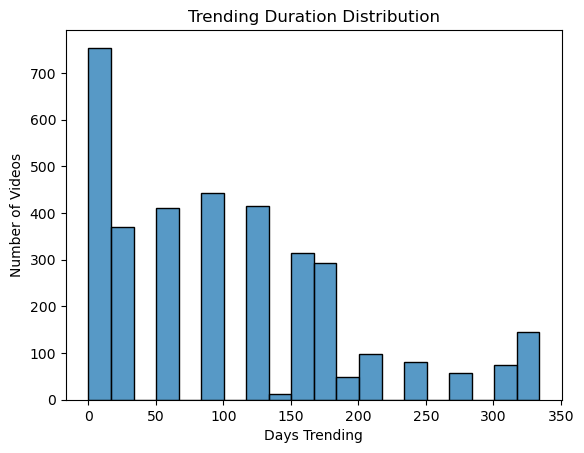

In [13]:
sns.histplot(duration_df['days_trending'], bins=20)
plt.title("Trending Duration Distribution")
plt.xlabel("Days Trending")
plt.ylabel("Number of Videos")
plt.show()